## Introduction

This project encompasses an in-depth analysis and prediction model development for agricultural yield. The datasets which was utilized in this analysis include information regarding pesticides, temperature, rainfall, and historical yield data. It was gotten from Kaggle https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset. The primary aim is to predict crop yield based on various factors such as temperature, pesticide usage, and environmental conditions.
Although, we couldn't get data that speak to the Nigerian Ecosystem, we deem it necessary to use the available data to serve as a template for future work.

# Importing the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

# Reading the dataset

In [2]:
df_pesticides = pd.read_csv("pesticides.csv")
df_yield_df = pd.read_csv("yield_df.csv")
df_yield = pd.read_csv("yield.csv")
df_temp= pd.read_csv("temp.csv")
df_rainfall = pd.read_csv("rainfall.csv")

## Data Overview

The datasets used in this study comprise:

Pesticides Data
Yield Data
Temperature Data
Rainfall Data

In [3]:
df_pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [4]:
df_yield .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [5]:
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [7]:
df_yield_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


### Inspecting the characteristics of the datasets,  to know the available columns, unique values in certain columns, and potential columns for merging or joining datasets based on common their attributes.

In [8]:
print(df_yield.columns)


Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [9]:
print(df_yield['Area'].nunique())
print(df_yield['Year'].nunique())

212
56


In [10]:
print(df_yield_df.columns)


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [11]:
print(df_yield_df['Area'].nunique())
print(df_yield_df['Year'].nunique())
df_yield_df.drop(['Unnamed: 0'], axis = 1 ,inplace = True)

101
23


In [12]:
print(df_rainfall.columns)


Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')


In [13]:
# Renaming the ' Area' column to remove the space before it for uniformity
df_rainfall.rename(columns = {' Area':'Area'},inplace = True) # 

print(df_rainfall['Area'].nunique())
print(df_rainfall['Year'].nunique())

217
31


In [14]:
print(df_temp.columns)


Index(['year', 'country', 'avg_temp'], dtype='object')


In [15]:
# Renaming the ' year' column to 'Year' for uniformity
df_temp.rename(columns = {'year':'Year','country':'Area'},inplace = True)

print(df_temp['Area'].nunique())
print(df_temp['Year'].nunique())
print(df_temp.columns)

137
271
Index(['Year', 'Area', 'avg_temp'], dtype='object')


### From the Analysis Above, it is clear that  the Year and and Country(Area) columns are common to all , this will  be used for merging the datasets on these columns.

In [16]:
df_temprain = pd.merge(df_rainfall,df_temp,on = ['Year','Area'])
df_temprainpest = pd.merge(df_temprain,df_pesticides , on = ['Year','Area'])

In [17]:
#Find common columns between df_trp and df_yield by iterating through their columns.
trplist =list(df_temprainpest.columns)
dfyield = list(df_yield.columns)
# Create a list (com1) containing column names present in both DataFrames.
com1 = [i for i in trplist if i in dfyield]

In [18]:
print(df_yield.columns)
print(df_yield_df.columns)



ly = [i for i in list(df_yield.columns) if i in (df_yield_df.columns)]

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [19]:
yield_df = pd.merge(df_yield_df,df_yield, on = ['Year','Area','Item'])

In [20]:
print(yield_df.shape)

print(yield_df.columns)
print(df_temprainpest.columns)

(28242, 16)
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'Domain Code', 'Domain', 'Area Code',
       'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp', 'Domain',
       'Element', 'Item', 'Unit', 'Value'],
      dtype='object')


In [21]:
#Assuming your first dataframe is df1 and second dataframe is df2
years_df1 = set(yield_df['Year'].unique())
years_df2 = set(df_temprainpest['Year'].unique())

# Find the years in df2 that are not in df1
years_only_in_df2 = years_df2 - years_df1

In [22]:
# Print the result
print("Years present in df1 but not in df2:", years_only_in_df2)

Years present in df1 but not in df2: set()


#### This result shows that are no mismatch or missing years in terms of the 'Year' column when comparing the two dataframes.

In [23]:
area_df1 = set(yield_df['Year'].unique())
area_df2 = set(df_temprainpest['Year'].unique())



In [24]:
# Doing same for Area, checking if there are Areas in df2 that are not in df1
area_only_in_df1 = area_df2 - area_df1

# Print the result
print("Area present in df1 but not in df2:", area_only_in_df1)

Area present in df1 but not in df2: set()


 # EDA

In [25]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Domain Code,Domain,Area Code,Element Code,Element,Item Code,Year Code,Unit,Value
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,56,1990,hg/ha,36613
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,116,1990,hg/ha,66667
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,27,1990,hg/ha,23333
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,83,1990,hg/ha,12500
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,236,1990,hg/ha,7000


In [26]:
print(yield_df['Item Code'].nunique())
print(yield_df['Item'].nunique())
## It has one unique value for each crop

10
10


In [27]:
print(yield_df['Domain'].nunique())
print(yield_df['Domain Code'].nunique())

1
1


In [28]:
print(yield_df['Area'].nunique())
print(yield_df['Area Code'].nunique())

101
101


In [29]:
print(yield_df['Element Code'].nunique())
print(yield_df['Element'].nunique())
print(yield_df['Unit'].nunique())

1
1
1


###### Based on these information , it is clear that the 'Year Code' and 'Domain Code' columns are redundant and unnecessary. The 'Area Code' column does not contribute meaningfully to drawing conclusions. Since the 'Domain' column has only one unique value, it is deemed irrelevant and is dropped. Additionally, 'Area Code' is mentioned twice, implying redundancy. The columns 'hg/ha_yield', 'Value', and 'Unit' are interrelated, and as a result, the last two columns are being dropped.

In [30]:
Yield_dfcopy = yield_df.copy()

In [31]:
Yield_dfcopy.drop(['Area Code','Year Code','Domain','Domain Code',
                       'Area Code','Item Code','Element','Element Code','Unit','Value'],
                      axis = 1 , inplace = True)

In [32]:
Yield_dfcopy.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [33]:
Yield_dfcopy[Yield_dfcopy['Area'] == 'Ghana'].head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
9161,Ghana,Cassava,1990,84170,1187.0,65.8,26.73
9162,Ghana,Maize,1990,11889,1187.0,65.8,26.73
9163,Ghana,Plantains and others,1990,61890,1187.0,65.8,26.73
9164,Ghana,"Rice, paddy",1990,16510,1187.0,65.8,26.73
9165,Ghana,Sorghum,1990,6310,1187.0,65.8,26.73


**The dataset should include the average temperature in Celsius, calculated based on temperature values.**

#  Feature Engineering: Splitting Items with Multiple Crops
The 'Item' column in Yield_final_data contains entries where multiple crops are listed using commas. To address this, the column is split using the comma as a delimiter, and the resulting lists are expanded into separate rows using the explode function. The index is then reset for clarity.

In [34]:
Yield_dfcopy['Item'] = Yield_dfcopy['Item'].str.split(', ')
Yield_dfcopy = Yield_dfcopy.explode('Item').reset_index(drop=True)

In [35]:
Yield_dfcopy.shape

(31630, 7)

In [36]:
Yield_dfcopy.loc[Yield_dfcopy['Area'].str.len().sort_values().index].head(12)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
17260,Iraq,Potatoes,1996,177576,216.0,616.00,23.96
17377,Iraq,paddy,2005,28879,216.0,873.01,19.96
17376,Iraq,Rice,2005,28879,216.0,873.01,19.96
17375,Iraq,paddy,2005,28879,216.0,873.01,23.58
17374,Iraq,Rice,2005,28879,216.0,873.01,23.58
17373,Iraq,Potatoes,2005,158431,216.0,873.01,19.96
17372,Iraq,Potatoes,2005,158431,216.0,873.01,23.58
17371,Iraq,Maize,2005,23079,216.0,873.01,19.96
17370,Iraq,Maize,2005,23079,216.0,873.01,23.58
17369,Iraq,Wheat,2004,11898,216.0,828.62,20.00


In [37]:
Yield_dfcopy['Item'].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice                    3388
paddy                   3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [38]:
Yield_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31630 entries, 0 to 31629
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           31630 non-null  object 
 1   Item                           31630 non-null  object 
 2   Year                           31630 non-null  int64  
 3   hg/ha_yield                    31630 non-null  int64  
 4   average_rain_fall_mm_per_year  31630 non-null  float64
 5   pesticides_tonnes              31630 non-null  float64
 6   avg_temp                       31630 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [39]:
Yield_dfcopy.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,31630.000000,31630.000000,31630.000000,31630.000000,31630.000000
mean,2001.536895,73162.659437,1153.085267,37062.481868,20.620043
std,7.053614,81302.121833,712.805826,59771.245918,6.255367
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,20918.000000,593.000000,1714.390000,16.780000
50%,2001.000000,37607.000000,1083.000000,17529.440000,21.550000
75%,2008.000000,94651.000000,1668.000000,48715.510000,26.030000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [40]:
Yield_dfcopy.groupby(['Area'],sort = True)[['hg/ha_yield']].sum().nlargest(10, 'hg/ha_yield')

,hg/ha_yield
Area,
India,342749968
Brazil,175935463
Mexico,139270288
Japan,133321962
Australia,121009524
Pakistan,80118288
Indonesia,75507330
Turkey,59531760
United Kingdom,55419990


In [41]:
Yield_dfcopy.groupby(['Item','Area'], sort=True)['hg/ha_yield'].sum().nlargest(20)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Cassava         Brazil             33671231
Potatoes        Pakistan           32969754
Sweet potatoes  Japan              32794236
Potatoes        Turkey             30530955
Yams            Japan              29165394
Sweet potatoes  Brazil             28266502
Potatoes        South Africa       27341980
                Germany            26672181
Yams            Brazil             23472053
Sweet potatoes  Pakistan           21687615
Name: hg/ha_yield, dtype: int64

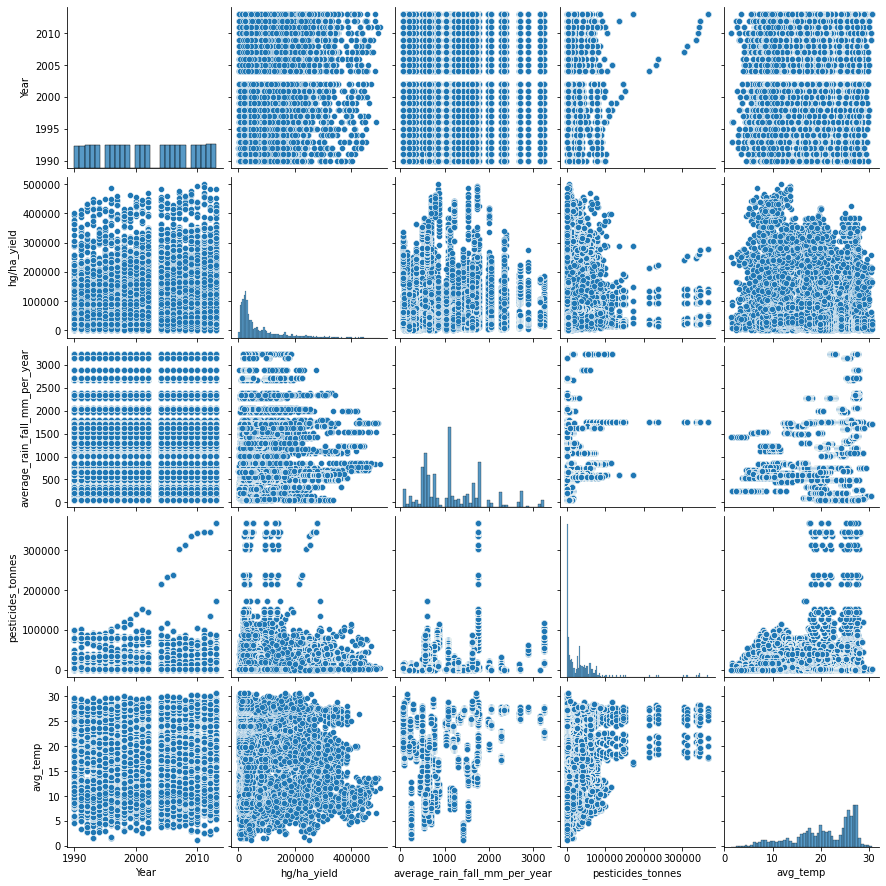

In [42]:
## Checking the pairplot between the columns
sns.pairplot(Yield_dfcopy)

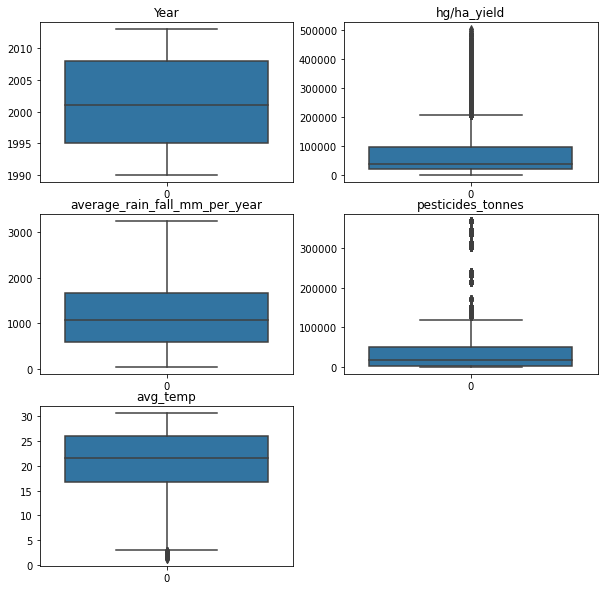

In [43]:
# Checking the data for outliers

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= Yield_dfcopy['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= Yield_dfcopy['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= Yield_dfcopy['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= Yield_dfcopy['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= Yield_dfcopy['avg_temp'])
plt.title('avg_temp')

plt.show()

##### It has been observed that there are outliers in the 'avg_temp' and 'pesticides_tonnes' columns

In [44]:
num_cor = Yield_dfcopy.select_dtypes(['int64','float64']).corr()

Text(0.5, 1.0, 'Heatmap')

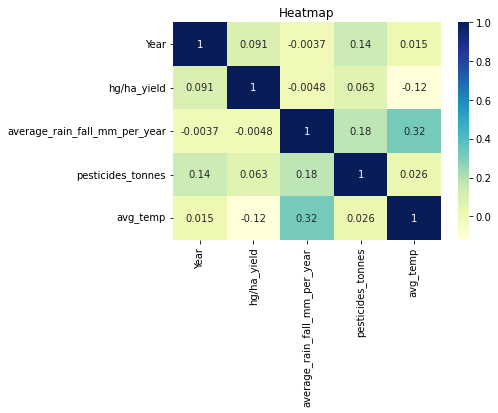

In [45]:
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

###### The plot visually indicates that there is no significant correlation observed among the columns. The absence of strong correlations suggests that the variables may not have a linear relationship or exhibit a direct influence on each other. Further statistical analysis may be conducted to explore any underlying patterns or relationships.

<AxesSubplot:xlabel='Year', ylabel='Count'>

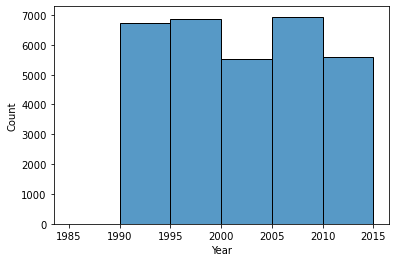

In [46]:
 #Checking the data distribution in the 
sns.histplot(Yield_dfcopy, x = 'Year' , bins = range(1985, 2020, 5))

<AxesSubplot:xlabel='pesticides_tonnes', ylabel='Count'>

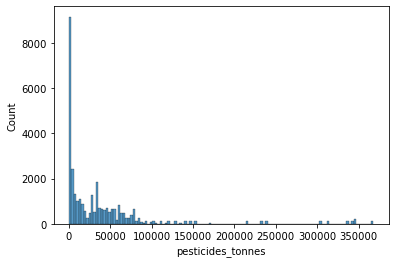

In [47]:
### Checking the pesticide usage data

## Checking the data distribution in the yield column
sns.histplot(Yield_dfcopy, x = 'pesticides_tonnes' )

######  There are outlier points in the datasets, to maintain data integrity while addressing the impact of extreme values on the analysis, mitigating potential high variance by removing only the upper 10% of data points is needed. 

In [48]:
Yield_dfcopy = Yield_dfcopy[Yield_dfcopy['pesticides_tonnes'] 
                                    <= Yield_dfcopy['pesticides_tonnes'].quantile(0.90)]

<AxesSubplot:xlabel='hg/ha_yield', ylabel='Count'>

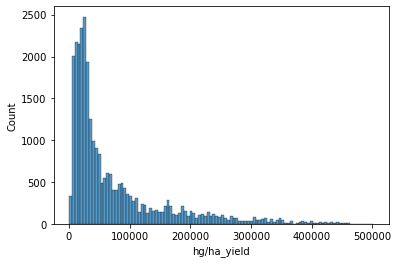

In [49]:
# Checking the data distribution in the yield column(if there have been any changes in the distribution after keeping only 90th quantile of yield)
sns.histplot(Yield_dfcopy, x = 'hg/ha_yield' )

<AxesSubplot:xlabel='pesticides_tonnes', ylabel='Count'>

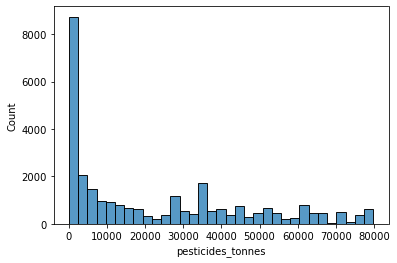

In [50]:
sns.histplot(Yield_dfcopy, x = 'pesticides_tonnes' )

In [51]:
 Yield_dfcopy= pd.get_dummies(Yield_dfcopy,columns = ['Item','Area'], drop_first = True)

## Splitting the data

In [52]:
split_ratio = 0.25  
split_index = int(len(Yield_dfcopy) * split_ratio)

# Get the 'Year' value at the split point
split_year = Yield_dfcopy['Year'].iloc[split_index]

print(f"Split Year: {split_year}")

Split Year: 2006


In [53]:
df_train = Yield_dfcopy[Yield_dfcopy['Year'] <= 2008]
df_test  = Yield_dfcopy[Yield_dfcopy['Year'] > 2008]

In [54]:
Yield_dfcopy.shape

(28959, 115)

In [55]:
df_train = df_train.drop('Year',axis = 1)
df_test  = df_test.drop('Year',axis = 1)

X_train = df_train.drop('hg/ha_yield',axis = 1 )
y_train = df_train['hg/ha_yield']
X_test  = df_test.drop('hg/ha_yield', axis = 1)
y_test  = df_test['hg/ha_yield']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22632, 113)
(22632,)
(6327, 113)
(6327,)


In [56]:
y_train.values.reshape(-1,1)
y_test.values.reshape(-1,1)

array([[ 55693],
       [219780],
       [ 16667],
       ...,
       [ 13142],
       [ 22222],
       [ 22888]], dtype=int64)

## Scaling and Model training

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training:  Training of model using Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score'])

LR_mse = mean_squared_error(y_test,y_pred) 
LR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2}
Model_perf = Model_perf.append(new_row,ignore_index = True)

In [60]:
from sklearn.preprocessing import PolynomialFeatures


# Create polynomial features
poly_features = PolynomialFeatures(degree=1)  
X_poly = poly_features.fit_transform(X_train)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# Predict using the trained model

X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)
print("Predicted values:", y_pred)

Predicted values: [ 22948.8125 174228.8125   2213.5625 ... -19339.5625  85013.875
 -12284.5625]


In [61]:
PR_mse = mean_squared_error(y_test,y_pred) 
PR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Polynomial Regression(degree 1)','MSE':PR_mse , 'R2_Score': PR_R2}
Model_perf = Model_perf.append(new_row,ignore_index = True)

# Model Performance

In [62]:
Model_perf

,Model_Name,MSE,R2_Score
0,Linear Regression,7.542342e+28,-8.749149e+18
1,Polynomial Regression(degree 1),3.652341e+25,-4.236731e+15


# Conclusion
This project aims to harness the power of data science to gain insights into agricultural trends, optimize crop yield predictions, and contribute to informed decision-making in the agricultural sector. Through careful analysis and modeling, we seek to provide valuable tools for farmers, policymakers, and stakeholders to enhance sustainable and efficient agricultural practices. Although, we couldn't get data that speak to the Nigerian Ecosystem, we deem it necessary to use the available data to serve as a template for future work.

# Reccommendation
**Acknowledging the limitation in obtaining data specific to the Nigerian ecosystem, leveraging the available dataset becomes pivotal as a template for future endeavors within the Nigerian agricultural landscape. Despite the absence of direct data, this project serves as a foundational framework, offering insights into methodologies, potential analyses, and model development that can be adapted and fine-tuned when specific Nigerian agricultural data becomes accessible.**

**By utilizing this existing dataset as a prototype, it provides a roadmap for structuring future data collection endeavors. It allows for the identification of essential variables, relevant features, and potential correlations that might be crucial within the Nigerian context.**

**Moreover, this groundwork helps in establishing methodologies for data preprocessing, outlier detection, feature engineering, and model selection, all of which are fundamental in any agricultural data analysis. These processes can serve as a starting point when integrating future Nigerian agricultural data, ensuring a more streamlined and efficient analysis pipeline.**

**In essence, while the current dataset might not directly represent the Nigerian ecosystem, the methodologies, approaches, and learnings gained through this project create a strong foundation. They stand as a valuable precursor, guiding future data collection efforts and analyses specifically tailored to the unique nuances of the Nigerian agricultural landscape.**